# 1. Clustering (K-Means and DBSCAN)

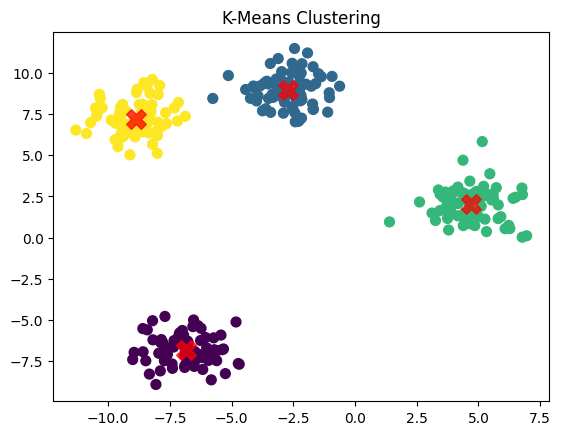

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.show()


# DBSCAN Clustering

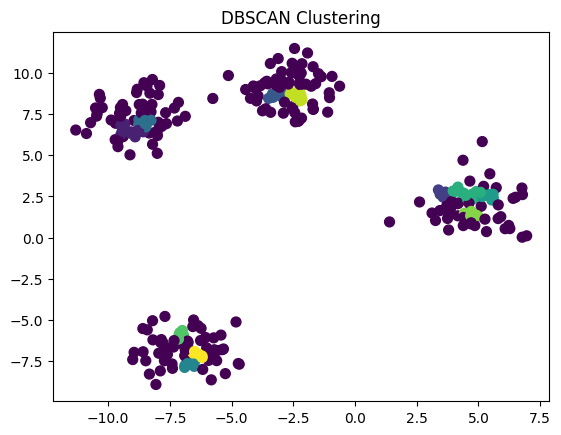

In [2]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


# 2. Anomaly Detection
## Isolation Forest

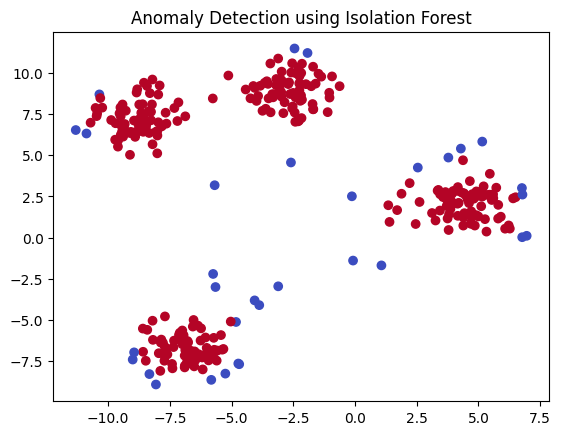

In [3]:
from sklearn.ensemble import IsolationForest

# Generate synthetic data
X_anomalies = np.concatenate([X, np.random.uniform(low=-6, high=6, size=(20, 2))])

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
y_iso = iso_forest.fit_predict(X_anomalies)

# Plotting the results
plt.scatter(X_anomalies[:, 0], X_anomalies[:, 1], c=y_iso, cmap='coolwarm')
plt.title('Anomaly Detection using Isolation Forest')
plt.show()


# 3. Density Estimation
## Kernel Density Estimation (KDE)

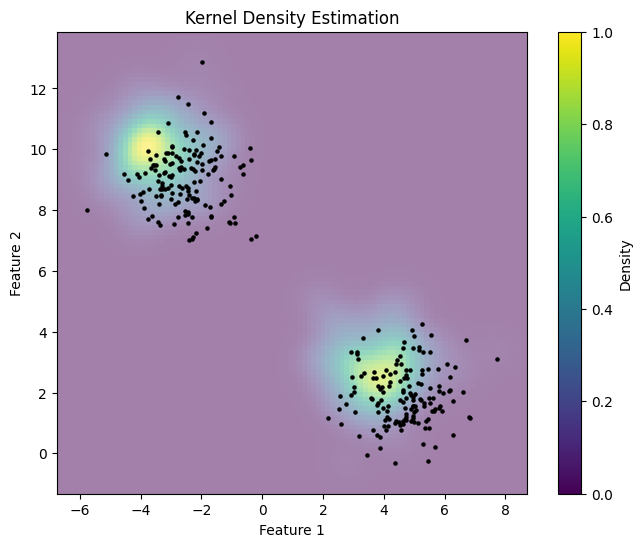

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=2, random_state=42)

# Fit the model
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)

# Create a grid of points where we want to evaluate the density
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_grid, y_grid = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_points)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.imshow(np.exp(log_density).reshape(x_grid.shape), extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='viridis', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c='black', s=5)
plt.title('Kernel Density Estimation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Density')
plt.show()



# 2. K-means Variants and Enhancements
K-means++

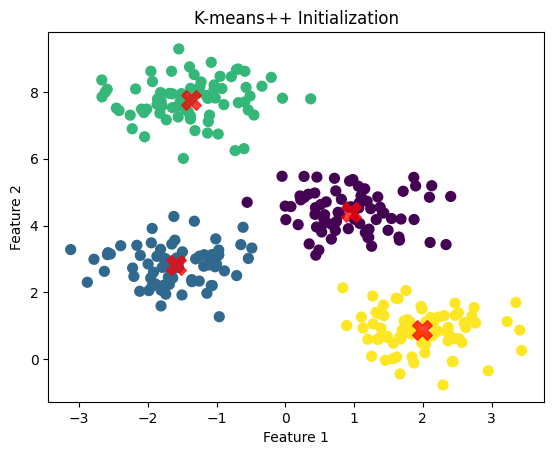

In [8]:
# K-means++ Initialization
kmeans_plus = KMeans(n_clusters=k, init='k-means++')
y_kmeans_plus = kmeans_plus.fit_predict(X)

# Visualize K-means++
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_plus, s=50, cmap='viridis')
centers_plus = kmeans_plus.cluster_centers_
plt.scatter(centers_plus[:, 0], centers_plus[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means++ Initialization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Mini-Batch K-means

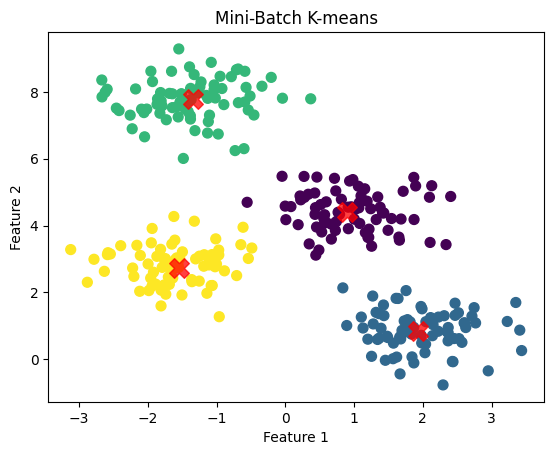

In [9]:
from sklearn.cluster import MiniBatchKMeans

# Mini-Batch K-means
mini_batch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=20)
y_mini_batch_kmeans = mini_batch_kmeans.fit_predict(X)

# Visualize Mini-Batch K-means
plt.scatter(X[:, 0], X[:, 1], c=y_mini_batch_kmeans, s=50, cmap='viridis')
centers_mini_batch = mini_batch_kmeans.cluster_centers_
plt.scatter(centers_mini_batch[:, 0], centers_mini_batch[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Mini-Batch K-means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 3. Image Segmentation using K-means

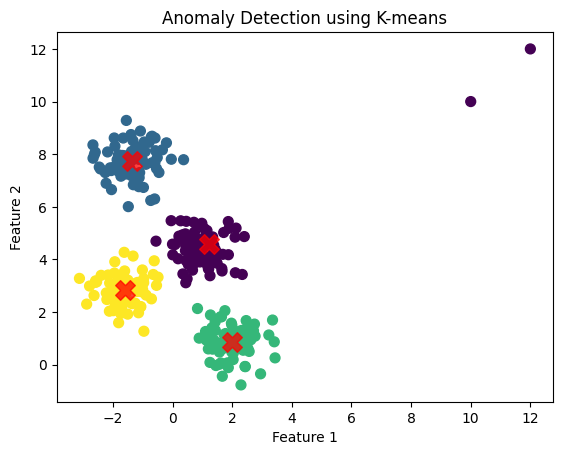

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data for anomaly detection
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Adding anomalies
data_with_anomalies = np.vstack([X, [[10, 10], [12, 12]]])  # Adding outliers

# K-means for anomaly detection
kmeans_anomaly = KMeans(n_clusters=4)
y_anomaly = kmeans_anomaly.fit_predict(data_with_anomalies)

# Visualize Anomaly Detection
plt.scatter(data_with_anomalies[:, 0], data_with_anomalies[:, 1], c=y_anomaly, s=50, cmap='viridis')
centers_anomaly = kmeans_anomaly.cluster_centers_
plt.scatter(centers_anomaly[:, 0], centers_anomaly[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Anomaly Detection using K-means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Example Project: Simulated Communication Between Two Users

Here's a simple Python project that simulates a form of communication between two users. This project won't involve real telepathy but can serve as a playful representation of how two users might "send" messages to each other.

Requirements
Python 3.x
No external libraries needed

In [13]:
class User:
    def __init__(self, name):
        self.name = name
        self.mind = []

    def think(self, thought):
        print(f"{self.name} is thinking: '{thought}'")
        self.mind.append(thought)

    def send_thought(self, recipient):
        if self.mind:
            thought = self.mind[-1]  # Get the last thought
            print(f"{self.name} sends thought to {recipient.name}: '{thought}'")
            recipient.receive_thought(thought)
        else:
            print(f"{self.name} has no thoughts to send.")

    def receive_thought(self, thought):
        print(f"{self.name} received a thought: '{thought}'")


# Example Usage
if __name__ == "__main__":
    user1 = User("Alice")
    user2 = User("Bob")

    user1.think("I wonder what Bob is doing.")
    user1.send_thought(user2)

    user2.think("I feel like Alice is thinking of me.")
    user2.send_thought(user1)

    user1.think("Let's meet for coffee.")
    user1.send_thought(user2)

    user2.think("Alice wants to meet for coffee.")


Alice is thinking: 'I wonder what Bob is doing.'
Alice sends thought to Bob: 'I wonder what Bob is doing.'
Bob received a thought: 'I wonder what Bob is doing.'
Bob is thinking: 'I feel like Alice is thinking of me.'
Bob sends thought to Alice: 'I feel like Alice is thinking of me.'
Alice received a thought: 'I feel like Alice is thinking of me.'
Alice is thinking: 'Let's meet for coffee.'
Alice sends thought to Bob: 'Let's meet for coffee.'
Bob received a thought: 'Let's meet for coffee.'
Bob is thinking: 'Alice wants to meet for coffee.'


Estimated Weights: [0.33333333 0.33333333 0.33333333]
Estimated Means:
 [[ 5.05373917e+00  5.03654453e+00]
 [-5.39215285e-03 -8.12711804e-03]
 [ 1.00126782e+01  1.00545928e+01]]
Estimated Covariances:
 [[[ 0.2264981  -0.0219896 ]
  [-0.0219896   0.27498308]]

 [[ 0.23895106  0.00320298]
  [ 0.00320298  0.2328377 ]]

 [[ 0.21441611  0.02045485]
  [ 0.02045485  0.27469346]]]
Generated New Instances:
 [[ 5.57277108  5.67746888]
 [ 4.64086829  5.40294587]
 [ 0.04569028 -0.30798718]
 [ 0.24893183  0.28011703]
 [ 0.78788999 -0.82471598]
 [ 9.74056142  9.64570202]]
Density Estimates:
 [-1.63558353 -2.97646666 -1.54283745 -3.12652292 -1.77339108 -1.7046882
 -3.46460669 -3.17590454 -2.08072172 -2.94161856 -2.66050224 -2.56197698
 -1.65057751 -2.26108704 -1.71238201 -3.56526499 -2.07430239 -2.6488719
 -3.5513311  -2.42843747 -1.8025419  -1.54083362 -2.87002992 -2.22341982
 -3.20495584 -1.62543578 -1.94185405 -2.52767443 -1.89361631 -2.07645626
 -1.62099729 -2.84890801 -2.84181384 -2.05321562 -1.

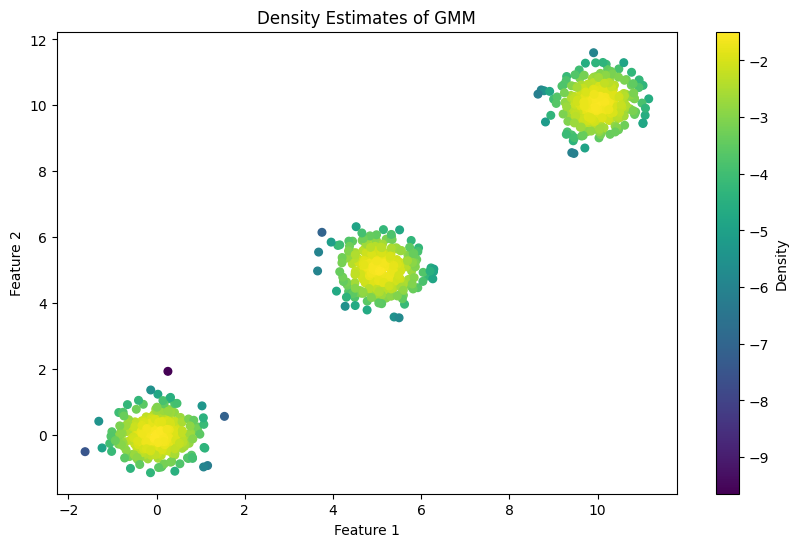

Anomalies Detected:
 [[-0.13232842  1.36008458]
 [ 0.25752384  1.92636575]
 [ 1.15732928 -0.9336326 ]
 [-1.62063367 -0.51219382]
 [ 1.06651669 -0.9760439 ]
 [ 1.5394404   0.55978746]
 [ 3.65155668  4.97285257]
 [ 3.6745151   5.54575343]
 [ 4.27599305  3.90059702]
 [ 5.38584936  3.57572869]
 [ 5.49900505  3.55187231]
 [ 3.75029714  6.14547129]
 [ 8.72303943 10.46715996]
 [ 9.41504158  8.56386889]
 [ 8.78787987 10.4420227 ]
 [ 9.46393049  8.53932476]
 [ 9.90976004 11.59655378]
 [ 8.64838385 10.33893766]]


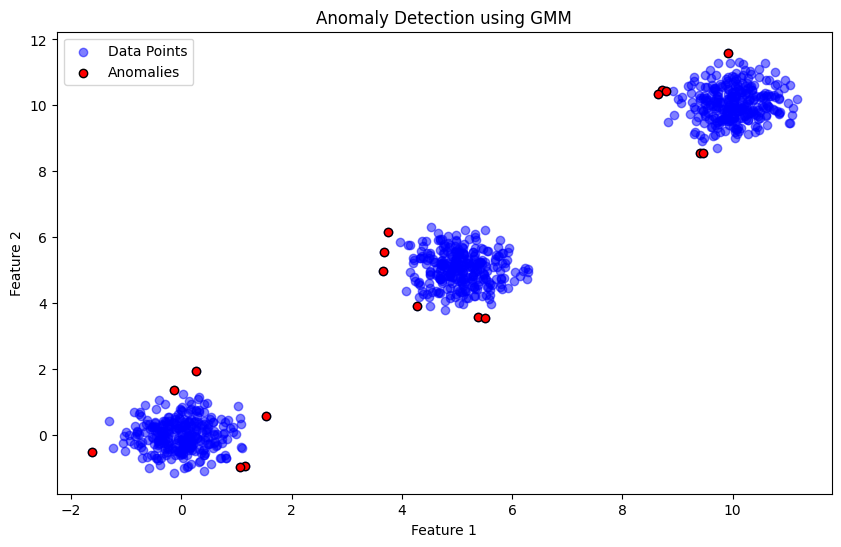

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(42)
n_samples = 300
# Generate random data for three different clusters
X1 = np.random.normal(loc=0, scale=0.5, size=(n_samples, 2))
X2 = np.random.normal(loc=5, scale=0.5, size=(n_samples, 2))
X3 = np.random.normal(loc=10, scale=0.5, size=(n_samples, 2))

# Combine the datasets
X = np.vstack([X1, X2, X3])

# Fit the Gaussian Mixture Model
n_components = 3
gm = GaussianMixture(n_components=n_components, covariance_type='full')
gm.fit(X)

# Estimated Parameters
weights = gm.weights_
means = gm.means_
covariances = gm.covariances_

print("Estimated Weights:", weights)
print("Estimated Means:\n", means)
print("Estimated Covariances:\n", covariances)

# Model Predictions
cluster_assignments = gm.predict(X)
probabilities = gm.predict_proba(X)

# Generating New Instances
X_new, _ = gm.sample(6)  # Sample 6 new instances
print("Generated New Instances:\n", X_new)

# Density Estimation
densities = gm.score_samples(X)
print("Density Estimates:\n", densities)

# Visualizing the Density Estimates
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=densities, cmap='viridis', s=30)
plt.colorbar(label='Density')
plt.title('Density Estimates of GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Anomaly Detection
density_threshold = np.percentile(densities, 2)  # 2% lowest densities
anomalies = X[densities < density_threshold]

print("Anomalies Detected:\n", anomalies)

# Visualizing the Anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points', alpha=0.5)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies', edgecolor='k')
plt.title('Anomaly Detection using GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


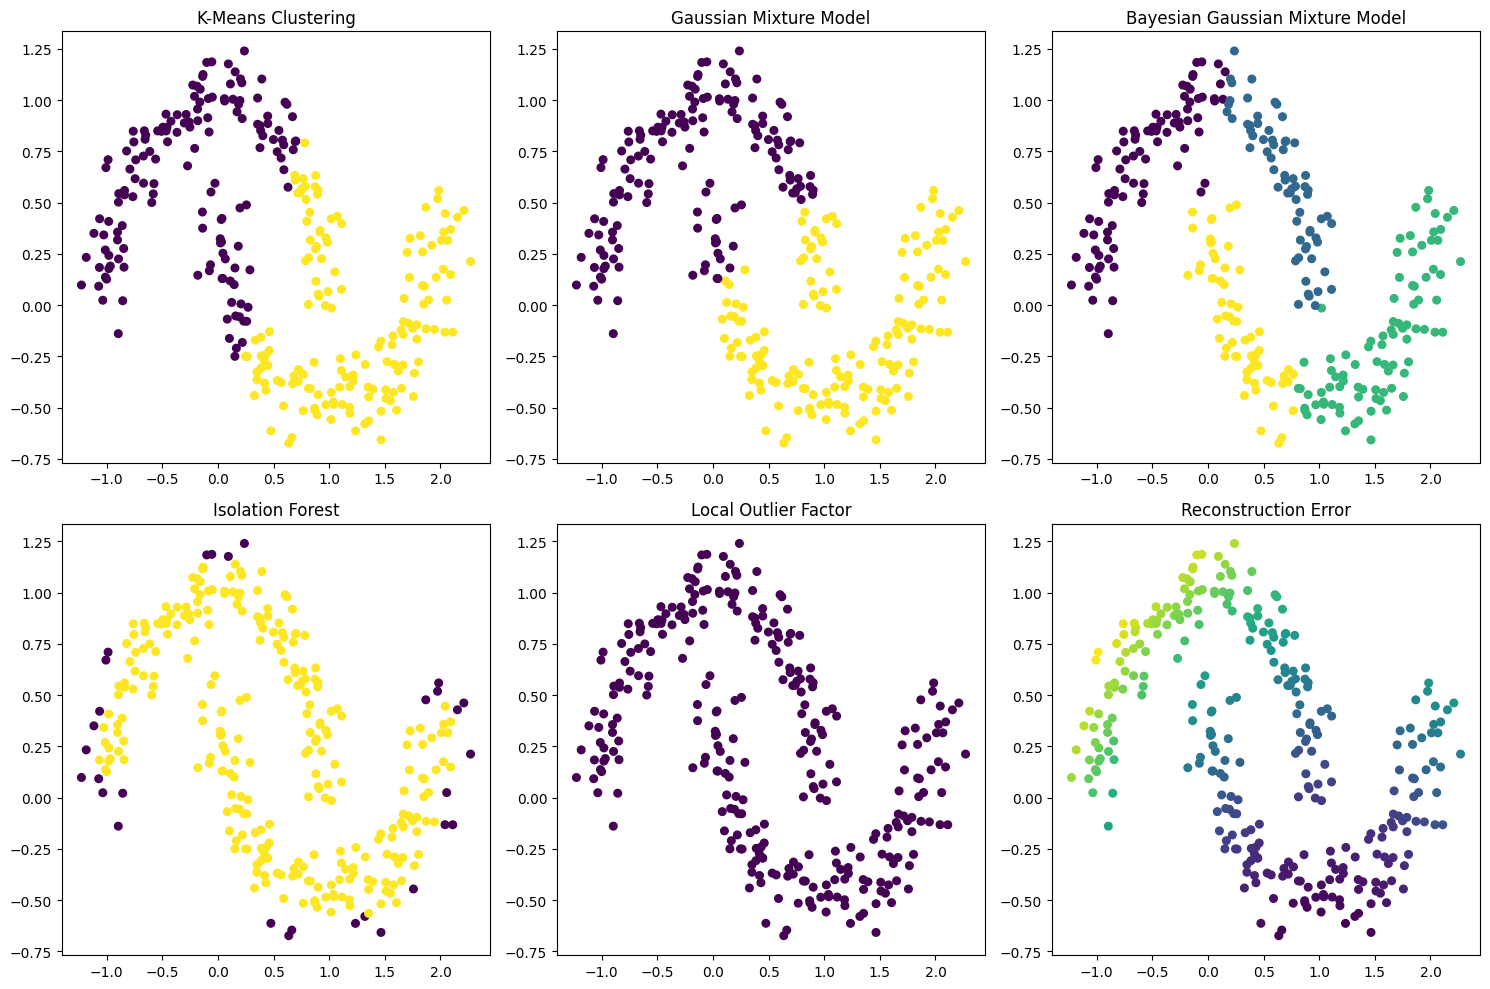

In [15]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

# Generating synthetic dataset (moons)
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# K-Means Clustering
def kmeans_clustering(X):
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X)
    return labels

# Gaussian Mixture Model
def gmm_clustering(X):
    gmm = GaussianMixture(n_components=2, random_state=42)
    labels = gmm.fit_predict(X)
    return labels

# Bayesian Gaussian Mixture Model
def bayesian_gmm_clustering(X):
    bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
    bgm.fit(X)
    labels = bgm.predict(X)
    return labels

# Anomaly Detection with Isolation Forest
def isolation_forest(X):
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    labels = iso_forest.fit_predict(X)
    return labels

# Anomaly Detection with Local Outlier Factor
def local_outlier_factor(X):
    lof = LocalOutlierFactor(n_neighbors=20)
    labels = lof.fit_predict(X)
    return labels

# PCA for dimensionality reduction and anomaly detection
def pca_reconstruction_error(X):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    reconstruction_error = np.mean((X_pca - X) ** 2, axis=1)
    return reconstruction_error

# Visualizing the clustering results
def plot_results(X, kmeans_labels, gmm_labels, bgm_labels, iso_labels, lof_labels, reconstruction_error):
    plt.figure(figsize=(15, 10))

    # K-Means
    plt.subplot(231)
    plt.title('K-Means Clustering')
    plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30)

    # Gaussian Mixture Model
    plt.subplot(232)
    plt.title('Gaussian Mixture Model')
    plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', s=30)

    # Bayesian Gaussian Mixture Model
    plt.subplot(233)
    plt.title('Bayesian Gaussian Mixture Model')
    plt.scatter(X[:, 0], X[:, 1], c=bgm_labels, cmap='viridis', s=30)

    # Isolation Forest
    plt.subplot(234)
    plt.title('Isolation Forest')
    plt.scatter(X[:, 0], X[:, 1], c=iso_labels, cmap='viridis', s=30)

    # Local Outlier Factor
    plt.subplot(235)
    plt.title('Local Outlier Factor')
    plt.scatter(X[:, 0], X[:, 1], c=lof_labels, cmap='viridis', s=30)

    # PCA Reconstruction Error
    plt.subplot(236)
    plt.title('Reconstruction Error')
    plt.scatter(X[:, 0], X[:, 1], c=reconstruction_error, cmap='viridis', s=30)

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Clustering and anomaly detection
    kmeans_labels = kmeans_clustering(X)
    gmm_labels = gmm_clustering(X)
    bgm_labels = bayesian_gmm_clustering(X)
    iso_labels = isolation_forest(X)
    lof_labels = local_outlier_factor(X)
    reconstruction_error = pca_reconstruction_error(X)

    # Plotting results
    plot_results(X, kmeans_labels, gmm_labels, bgm_labels, iso_labels, lof_labels, reconstruction_error)
